In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [4]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [7]:
df = pd.read_csv(r'C:\Users\mi\MLcourse\mlcourse.ai\data\mlbootcamp5_train.csv', sep=';')

In [10]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


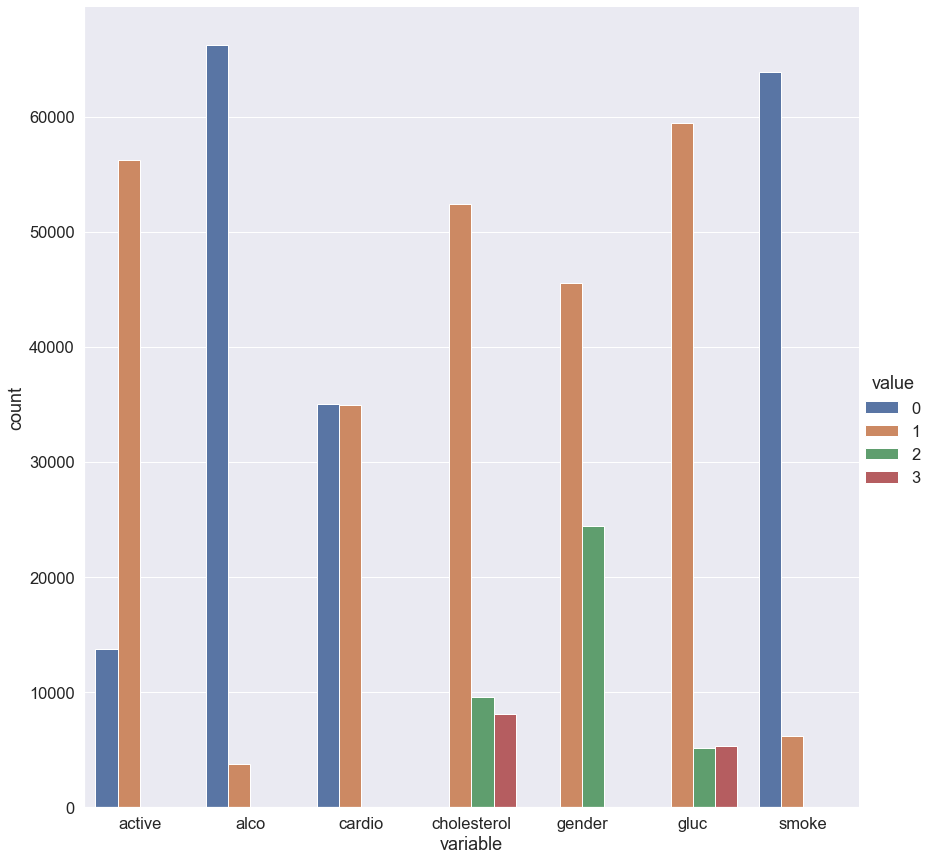

In [11]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

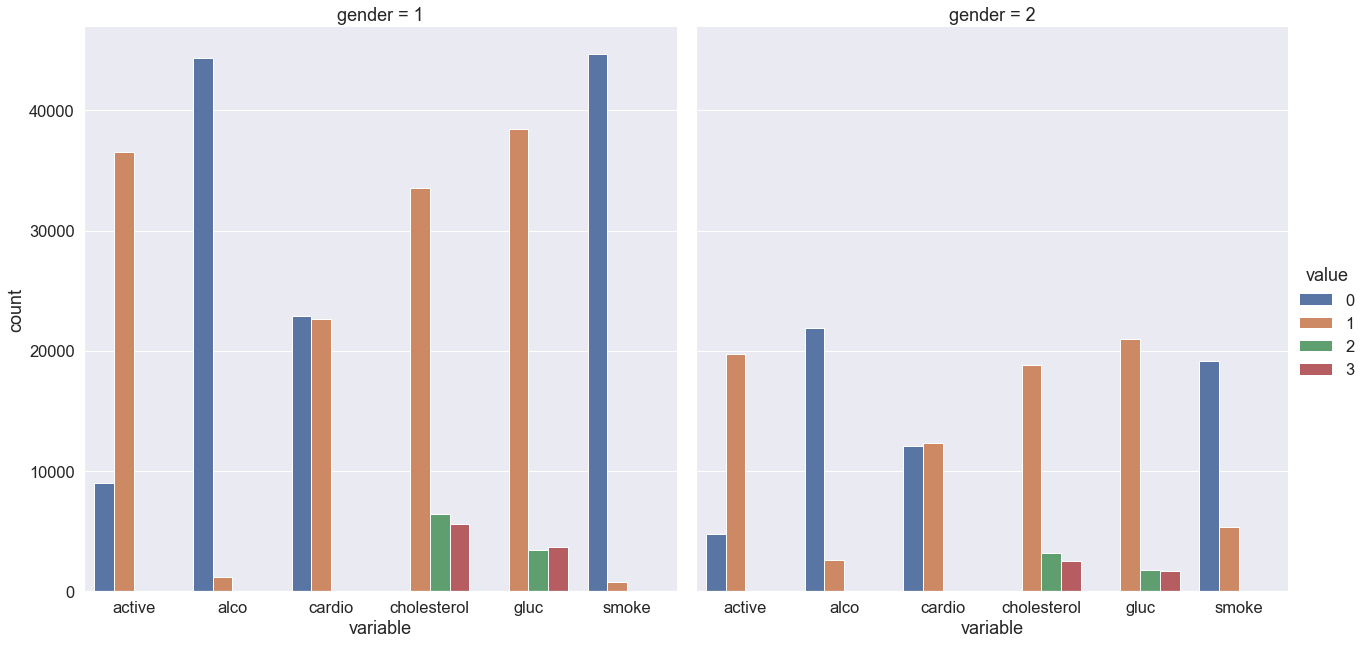

In [20]:
df_uniques = pd.melt(frame=df, value_vars=['cardio','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['gender'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'gender'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='gender', data=df_uniques, kind='bar', size=9);

In [13]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [43]:
df.query("gender ==  1")['alco'].mean()

0.02549967054689216

In [44]:
df.query("gender ==  2")['alco'].mean()

0.10637515324887617

In [45]:
df.query("gender ==  1")['height'].mean()

161.35561168460356

In [46]:
df.query("gender ==  2")['height'].mean()

169.94789538210054

In [47]:
df.query("gender ==  2")['smoke'].mean()

0.21888026154474868

In [48]:
df.query("gender ==  1")['smoke'].mean()

0.017856358444981332

In [52]:
df.query("smoke ==  1")['age'].median()

19125.0

In [53]:
df.query("smoke ==  0")['age'].median()

19722.0

In [66]:
df['new_age'] = df['age']/365

In [62]:
df.query("smoke ==  1")['new_age'].median()

52.397260273972606

In [64]:
df.query("smoke ==  0")['new_age'].median()

54.032876712328765

In [85]:
from math import ceil, sqrt

In [72]:
df['age_years'] = df['new_age'].map(ceil)

In [73]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,51
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,56
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,49
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,53
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548,62
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616,53
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,62


In [74]:
old_people = df.query("(age_years >= 60) & (age_years <= 64)")

In [79]:
old_people['cholesterol'].describe()

count    14449.000000
mean         1.516783
std          0.788122
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: cholesterol, dtype: float64

In [80]:
smoking_old_man = old_people.query("(smoke == 1) & (gender == 2)")

In [81]:
smoking_old_man.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,age_years
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0,59.602740,60
67,90,22099,2,171,97.0,150,100,3,1,1,0,1,1,60.545205,61
177,240,21848,2,170,69.0,120,80,1,1,1,1,1,0,59.857534,60
182,248,22671,2,174,74.0,130,80,3,1,1,0,1,1,62.112329,63
297,410,22415,2,173,70.0,130,70,2,1,1,1,1,0,61.410959,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69697,99551,23224,2,151,45.0,120,70,3,1,1,1,0,1,63.627397,64
69699,99553,23183,2,178,113.0,130,90,2,2,1,0,1,1,63.515068,64
69814,99711,22759,2,167,76.0,120,80,1,1,1,0,1,0,62.353425,63
69857,99775,22637,2,177,63.0,150,70,1,1,1,0,1,1,62.019178,63


In [82]:
smoking_old_man.query("(cholesterol == 1) & (ap_hi < 120)")['cardio'].mean()

0.24

In [83]:
smoking_old_man.query("(cholesterol == 3) & (ap_hi < 180) & (ap_hi >= 160)")['cardio'].mean()

0.8636363636363636

In [84]:
0.8636363636363636/0.24

3.5984848484848486

In [89]:
df['BMI'] = df['weight']/(df['height']/100)**2

In [90]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,51,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,56,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,52,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,49,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,48,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,53,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548,62,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616,53,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,62,27.099251


In [99]:
67/1.76**2

21.62964876033058

In [94]:
df.query("gender == 1")['BMI'].mean()

27.98758344183285

In [95]:
df.query("gender == 2")['BMI'].mean()

26.754442357289356

In [100]:
df.query("cardio == 0")['BMI'].mean()

26.5481752067945

In [101]:
df.query("cardio == 1")['BMI'].mean()

28.56606062701535

In [104]:
df.query("(cardio == 0) & (gender == 2) & (alco == 0)")['BMI'].mean()

25.87263807546017

In [105]:
df.query("(cardio == 0) & (gender == 1) & (alco == 0)")['BMI'].mean()

26.845406594131507

In [106]:
cleared_df = df[(df['ap_lo'] <= df['ap_hi']) &
               (df['height'] >= df['height'].quantile(0.025)) &
               (df['height'] <= df['height'].quantile(0.975)) &
               (df['weight'] >= df['weight'].quantile(0.025)) &
               (df['weight'] <= df['weight'].quantile(0.975))]

In [107]:
cleared_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,51,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,56,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,52,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,49,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,48,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,53.969863,54,23.661439
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,57.736986,58,29.384757
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,53,26.927438
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,62,27.099251


In [108]:
63259/70000

0.9037

In [117]:
corr = df.corr(method='pearson')

<AxesSubplot:>

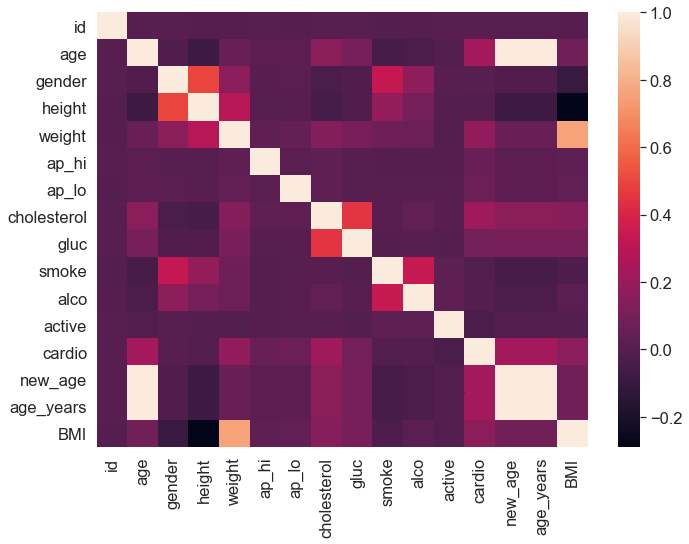

In [118]:
sns.heatmap(corr)

In [119]:
corr_spearman = df.corr(method='spearman')

<AxesSubplot:>

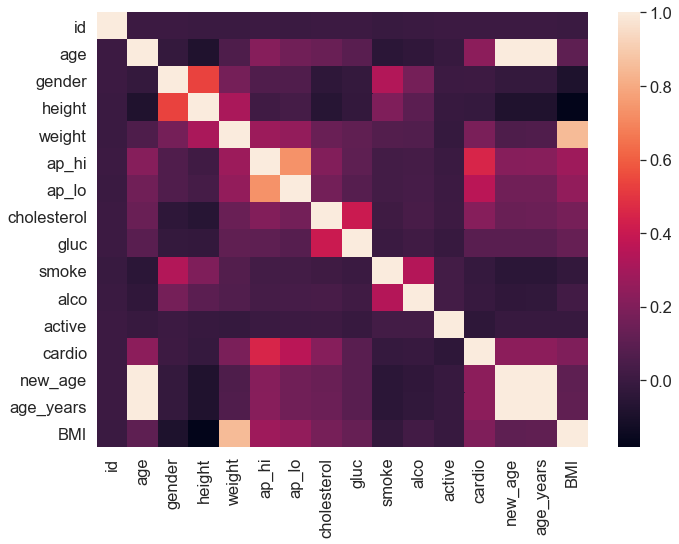

In [120]:
sns.heatmap(corr_spearman)

<AxesSubplot:xlabel='age_years', ylabel='count'>

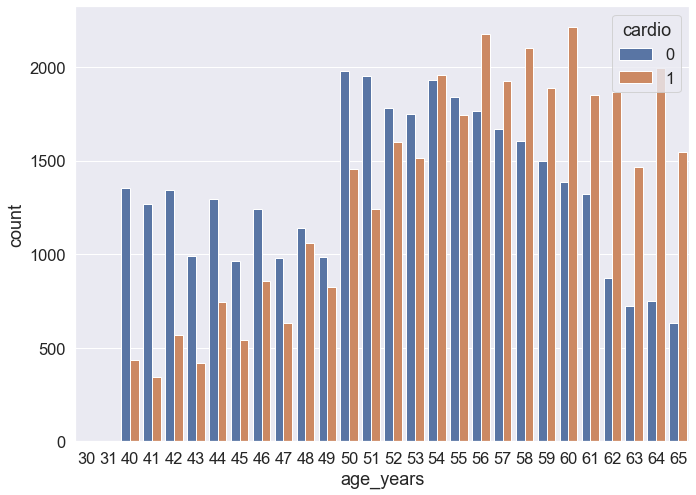

In [121]:
sns.countplot(x="age_years", hue='cardio', data=df)